<a href="https://colab.research.google.com/github/katoch30/Air-Quality-Analysis-CC-Bhilai/blob/main/CC_Air_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [ ]:

# Load workbook and select sheet
file_path = "site_553620250309182753.xlsx"  # Update with your file path
wb = openpyxl.load_workbook(file_path, data_only=True)
sheet = wb.active  # Use the first sheet
header_row_index=0
i=0
for row in sheet.iter_rows(min_row=1, max_row=20, values_only=True):  # Checking first 20 rows
    print(row)
    i+=1
    if "From Date" in row and "To Date" in row:
        break
# Read data from that row onward
data = []
for row in sheet.iter_rows(min_row=i + 1, values_only=True):
    data.append(row)

# Convert to Pandas DataFrame
columns = ["From", "To", "PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "SO2", "CO",
           "Ozone", "Benzene", "Toluene", "Eth-Benzene", "MP-Xylene", "O-Xylene", "Xylene"]

df = pd.DataFrame(data, columns=columns)

# Convert numeric columns to proper data types
numeric_columns = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "SO2", "CO",
                   "Ozone", "Benzene", "Toluene", "Eth-Benzene", "MP-Xylene", "O-Xylene", "Xylene"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")



print(df.info())

# Display cleaned DataFrame
print(df.head())



('CENTRAL POLLUTION CONTROL BOARD', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None)
('CONTINUOUS AMBIENT AIR QUALITY', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None)
('Date: Sunday, Mar 09 2025', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None)
('Time: 06:27:54 PM', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None)
('State', 'Chhattisgarh', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None)
('City', 'Bhilai', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None)
('Station', 'Civic Center, Bhilai - Bhilai Steel Plant', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None)
('Parameter', 'PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,Eth-Benzene,MP-Xylene,O-Xylene,Xylene', None, None,

In [ ]:
df=df.fillna(0)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8779 entries, 0 to 8778
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   From         8779 non-null   object 
 1   To           8779 non-null   object 
 2   PM2.5        8779 non-null   float64
 3   PM10         8779 non-null   float64
 4   NO           8779 non-null   float64
 5   NO2          8779 non-null   float64
 6   NOx          8779 non-null   float64
 7   NH3          8779 non-null   float64
 8   SO2          8779 non-null   float64
 9   CO           8779 non-null   float64
 10  Ozone        8779 non-null   float64
 11  Benzene      8779 non-null   float64
 12  Toluene      8779 non-null   float64
 13  Eth-Benzene  8779 non-null   float64
 14  MP-Xylene    8779 non-null   float64
 15  O-Xylene     8779 non-null   float64
 16  Xylene       8779 non-null   float64
dtypes: float64(15), object(2)
memory usage: 1.1+ MB
None


In [ ]:
df.drop(['Benzene','Toluene','Eth-Benzene','MP-Xylene','O-Xylene','Xylene'],axis=1,inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8779 entries, 0 to 8778
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   From    8779 non-null   object 
 1   To      8779 non-null   object 
 2   PM2.5   8779 non-null   float64
 3   PM10    8779 non-null   float64
 4   NO      8779 non-null   float64
 5   NO2     8779 non-null   float64
 6   NOx     8779 non-null   float64
 7   NH3     8779 non-null   float64
 8   SO2     8779 non-null   float64
 9   CO      8779 non-null   float64
 10  Ozone   8779 non-null   float64
dtypes: float64(9), object(2)
memory usage: 754.6+ KB
None


In [ ]:
df['From']=pd.to_datetime(df['From'], dayfirst=True)
df['To']=pd.to_datetime(df['To'],dayfirst=True)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8779 entries, 0 to 8778
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   From    8779 non-null   datetime64[ns]
 1   To      8779 non-null   datetime64[ns]
 2   PM2.5   8779 non-null   float64       
 3   PM10    8779 non-null   float64       
 4   NO      8779 non-null   float64       
 5   NO2     8779 non-null   float64       
 6   NOx     8779 non-null   float64       
 7   NH3     8779 non-null   float64       
 8   SO2     8779 non-null   float64       
 9   CO      8779 non-null   float64       
 10  Ozone   8779 non-null   float64       
dtypes: datetime64[ns](2), float64(9)
memory usage: 754.6 KB
None
                 From                  To  PM2.5  PM10   NO  NO2  NOx  NH3  \
0 2024-03-08 00:00:00 2024-03-08 01:00:00    0.0   0.0  0.0  0.0  0.0  0.0   
1 2024-03-08 01:00:00 2024-03-08 02:00:00    0.0   0.0  0.0  0.0  0.0  0.0   
2 2024-03-08 02:00:00

In [ ]:
df.drop(['To'],axis=1,inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8779 entries, 0 to 8778
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   From    8779 non-null   datetime64[ns]
 1   PM2.5   8779 non-null   float64       
 2   PM10    8779 non-null   float64       
 3   NO      8779 non-null   float64       
 4   NO2     8779 non-null   float64       
 5   NOx     8779 non-null   float64       
 6   NH3     8779 non-null   float64       
 7   SO2     8779 non-null   float64       
 8   CO      8779 non-null   float64       
 9   Ozone   8779 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 686.0 KB
None


In [ ]:
df.set_index('From',inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8779 entries, 2024-03-08 00:00:00 to 2025-03-08 18:00:00
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   8779 non-null   float64
 1   PM10    8779 non-null   float64
 2   NO      8779 non-null   float64
 3   NO2     8779 non-null   float64
 4   NOx     8779 non-null   float64
 5   NH3     8779 non-null   float64
 6   SO2     8779 non-null   float64
 7   CO      8779 non-null   float64
 8   Ozone   8779 non-null   float64
dtypes: float64(9)
memory usage: 685.9 KB
None


In [ ]:
pollutant_24hr=['PM2.5','PM10','NO','NO2','NOx','NH3','SO2']
pollutant_8hr=['CO','Ozone']
df_24hr = df[pollutant_24hr].resample("D").mean()
df_8hr = df[pollutant_8hr].rolling(window=8, min_periods=1).mean().resample("D").max()

df_daily = pd.concat([df_24hr, df_8hr], axis=1)


# Display the cleaned daily DataFrame
print(df_daily.head())

               PM2.5       PM10        NO       NO2       NOx      NH3  \
From                                                                     
2024-03-08  3.072083   8.754167  0.815000  2.385833  3.200833  1.08250   
2024-03-09  3.520417  12.969583  1.537083  1.605833  3.143333  1.82625   
2024-03-10  0.000000   0.000000  0.000000  0.000000  0.000000  0.00000   
2024-03-11  0.000000   0.000000  0.000000  0.000000  0.000000  0.00000   
2024-03-12  0.000000   0.000000  0.000000  0.000000  0.000000  0.00000   

                 SO2       CO     Ozone  
From                                     
2024-03-08  1.511667  0.56250  16.37000  
2024-03-09  1.700417  0.64375  28.83375  
2024-03-10  0.000000  0.00000   0.00000  
2024-03-11  0.000000  0.00000   0.00000  
2024-03-12  0.000000  0.00000   0.00000  


In [ ]:
print(df_daily.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2024-03-08 to 2025-03-08
Freq: D
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   366 non-null    float64
 1   PM10    366 non-null    float64
 2   NO      366 non-null    float64
 3   NO2     366 non-null    float64
 4   NOx     366 non-null    float64
 5   NH3     366 non-null    float64
 6   SO2     366 non-null    float64
 7   CO      366 non-null    float64
 8   Ozone   366 non-null    float64
dtypes: float64(9)
memory usage: 28.6 KB
None


In [ ]:
print(df.describe())

             PM2.5         PM10           NO          NO2          NOx  \
count  8779.000000  8779.000000  8779.000000  8779.000000  8779.000000   
mean     24.581138    53.737959     5.813216     6.794782    12.883184   
std      22.022039    48.746877     2.840642     3.159375     5.216254   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      11.480000    21.710000     4.000000     5.980000    10.000000   
50%      19.190000    45.520000     6.030000     6.050000    14.010000   
75%      31.240000    71.450000     7.820000     7.050000    15.040000   
max     332.690000   835.150000    92.690000    45.400000   103.850000   

               NH3          SO2           CO        Ozone  
count  8779.000000  8779.000000  8779.000000  8779.000000  
mean     11.891837     7.653446     0.795879    21.011321  
std       7.039164     2.807491     0.422075    16.601437  
min       0.000000     0.000000     0.000000     0.000000  
25%       6.960000     7.670000  

In [ ]:
condition_pm = (df_daily["PM10"] !=0) | (df_daily["PM2.5"] !=0)

# Condition 2: Drop rows where only 3 or fewer columns have non-zero values
condition_nonzero = (df_daily.iloc[:, 2:] != 0).sum(axis=1) > 3  # Skipping first two datetime columns

# Apply both conditions
df_filtered = df_daily[condition_pm & condition_nonzero]

print(df_filtered.info())
print(df_filtered.head())



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 344 entries, 2024-03-08 to 2025-03-08
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   344 non-null    float64
 1   PM10    344 non-null    float64
 2   NO      344 non-null    float64
 3   NO2     344 non-null    float64
 4   NOx     344 non-null    float64
 5   NH3     344 non-null    float64
 6   SO2     344 non-null    float64
 7   CO      344 non-null    float64
 8   Ozone   344 non-null    float64
dtypes: float64(9)
memory usage: 26.9 KB
None
                PM2.5       PM10        NO        NO2        NOx        NH3  \
From                                                                          
2024-03-08   3.072083   8.754167  0.815000   2.385833   3.200833   1.082500   
2024-03-09   3.520417  12.969583  1.537083   1.605833   3.143333   1.826250   
2024-03-18   0.987500   2.856250  0.589167   1.153333   1.307500   1.742500   
2024-03-19  11.980417  33.704

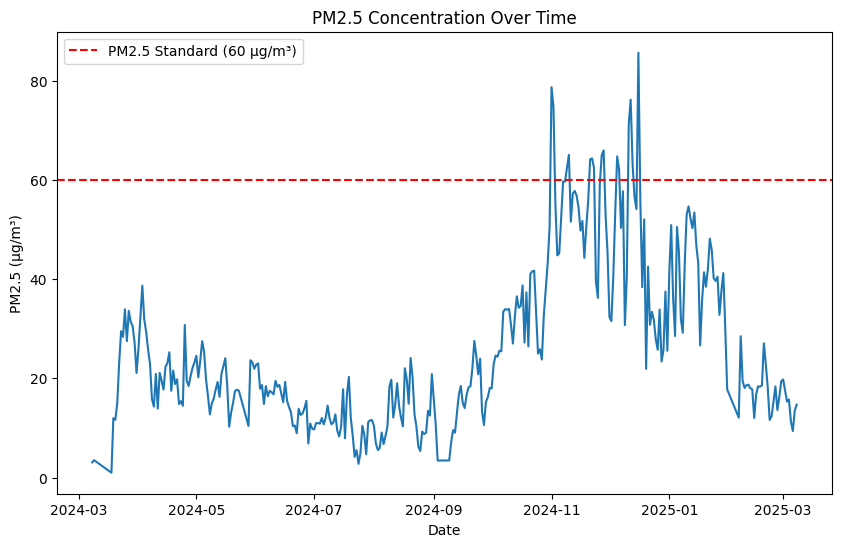

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_filtered['PM2.5'])
plt.axhline(y=60, color='r', linestyle='--', label="PM2.5 Standard (60 µg/m³)")
plt.xlabel("Date")
plt.ylabel("PM2.5 (µg/m³)")
plt.title("PM2.5 Concentration Over Time")
plt.legend()
plt.show()

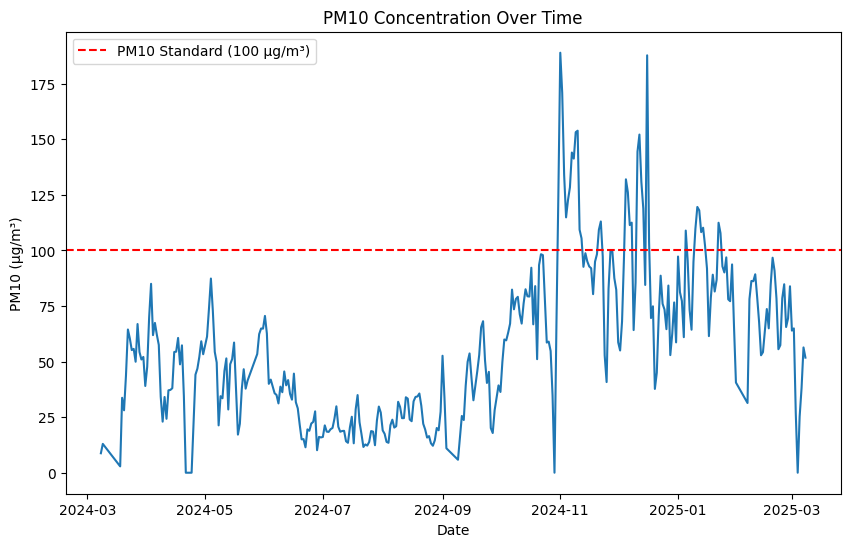

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_filtered['PM10'])
plt.axhline(y=100, color='r', linestyle='--', label="PM10 Standard (100 µg/m³)")
plt.xlabel("Date")
plt.ylabel("PM10 (µg/m³)")
plt.title("PM10 Concentration Over Time")
plt.legend()
plt.show()

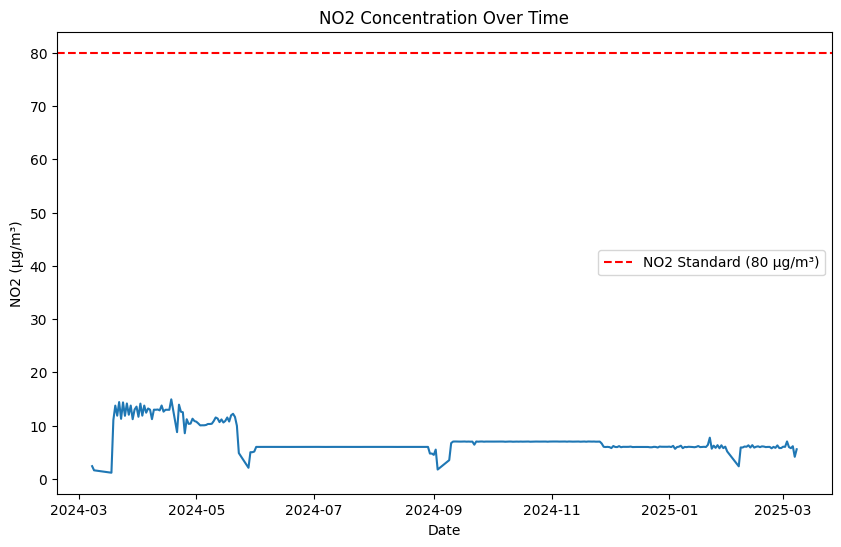

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_filtered['NO2'])
plt.axhline(y=80, color='r', linestyle='--', label="NO2 Standard (80 µg/m³)")
plt.xlabel("Date")
plt.ylabel("NO2 (µg/m³)")
plt.title("NO2 Concentration Over Time")
plt.legend()
plt.show()

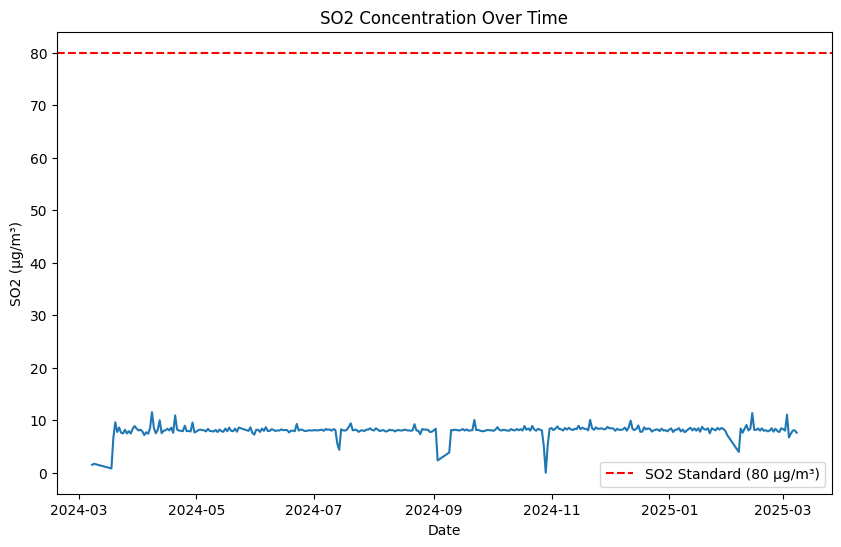

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_filtered['SO2'])
plt.axhline(y=80, color='r', linestyle='--', label="SO2 Standard (80 µg/m³)")
plt.xlabel("Date")
plt.ylabel("SO2 (µg/m³)")
plt.title("SO2 Concentration Over Time")
plt.legend()
plt.show()

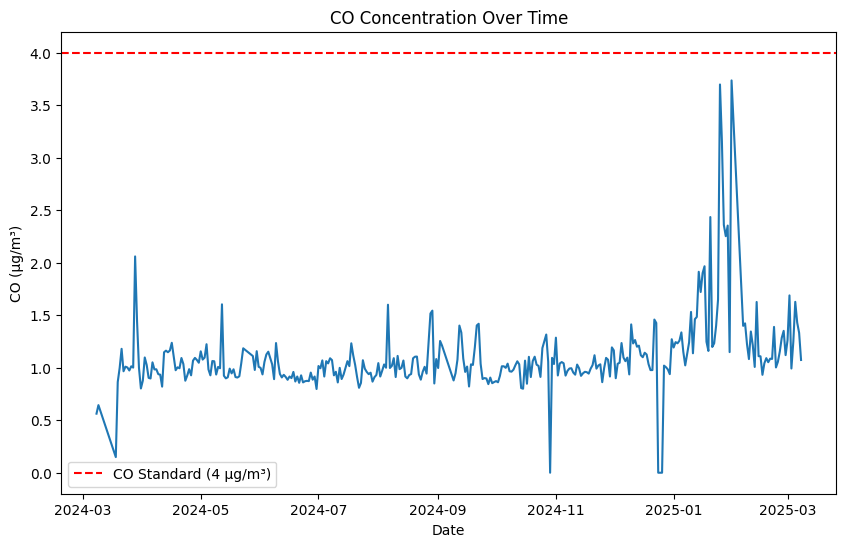

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_filtered['CO'])
plt.axhline(y=4, color='r', linestyle='--', label="CO Standard (4 µg/m³)")
plt.xlabel("Date")
plt.ylabel("CO (µg/m³)")
plt.title("CO Concentration Over Time")
plt.legend()
plt.show()

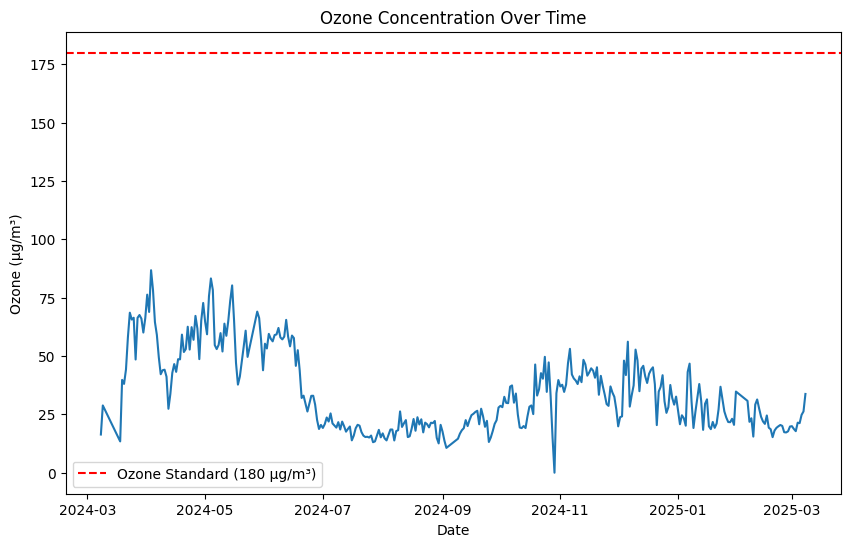

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_filtered['Ozone'])
plt.axhline(y=180, color='r', linestyle='--', label="Ozone Standard (180 µg/m³)")
plt.xlabel("Date")
plt.ylabel("Ozone (µg/m³)")
plt.title("Ozone Concentration Over Time")
plt.legend()
plt.show()

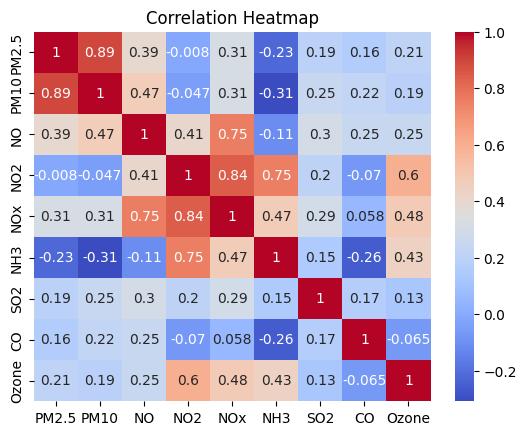

In [ ]:
sns.heatmap(df_filtered.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
def pm25_si(value):
  if value< 0:
    return 0
  elif value >=0 and value <=30:
    return value
  elif value >30 and value <=60:
    return 50 + ((value-30)/30)*50
  elif value >60 and value <=90:
    return 100 + ((value-60)/30)*100
  elif value >90 and value <=120:
    return 200 + ((value-90)/30)*100
  elif value >120 and value <=250:
    return 300 + ((value-120)/130)*100
  elif value >250:
    return 400 + ((value-250)/100)*100

df_filtered['PM2.5_SI']=df_filtered['PM2.5'].apply(pm25_si)
print(df_filtered.head())


                PM2.5       PM10        NO        NO2        NOx        NH3  \
From                                                                          
2024-03-08   3.072083   8.754167  0.815000   2.385833   3.200833   1.082500   
2024-03-09   3.520417  12.969583  1.537083   1.605833   3.143333   1.826250   
2024-03-18   0.987500   2.856250  0.589167   1.153333   1.307500   1.742500   
2024-03-19  11.980417  33.704167  6.425417  11.052917  17.477917  17.478333   
2024-03-20  11.632917  28.080417  7.044167  13.749167  20.576250  20.791667   

                 SO2       CO     Ozone   PM2.5_SI  
From                                                
2024-03-08  1.511667  0.56250  16.37000   3.072083  
2024-03-09  1.700417  0.64375  28.83375   3.520417  
2024-03-18  0.809167  0.14875  13.41750   0.987500  
2024-03-19  6.670000  0.86375  39.78250  11.980417  
2024-03-20  9.611250  0.99875  38.06250  11.632917  


<ipython-input-54-5f9093835dca>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['PM2.5_SI']=df_filtered['PM2.5'].apply(pm25_si)


In [ ]:
def pm10_si(value):
  if value< 0:
    return 0
  elif value >=0 and value <=50:
    return value
  elif value >50 and value <=100:
    return 50 +((value-50)/50)*50
  elif value >100 and value <=250:
    return 100 + ((value-100)/150)*100
  elif value >250 and value <=350:
    return 200 + ((value-250)/100)*100
  elif value >350 and value <=430:
    return 300 + ((value-350)/80)*100
  elif value >430:
    return 400 + ((value-430)/80)*100

df_filtered['PM10_SI']=df_filtered['PM10'].apply(pm10_si)
print(df_filtered.head())

                PM2.5       PM10        NO        NO2        NOx        NH3  \
From                                                                          
2024-03-08   3.072083   8.754167  0.815000   2.385833   3.200833   1.082500   
2024-03-09   3.520417  12.969583  1.537083   1.605833   3.143333   1.826250   
2024-03-18   0.987500   2.856250  0.589167   1.153333   1.307500   1.742500   
2024-03-19  11.980417  33.704167  6.425417  11.052917  17.477917  17.478333   
2024-03-20  11.632917  28.080417  7.044167  13.749167  20.576250  20.791667   

                 SO2       CO     Ozone   PM2.5_SI    PM10_SI  
From                                                           
2024-03-08  1.511667  0.56250  16.37000   3.072083   8.754167  
2024-03-09  1.700417  0.64375  28.83375   3.520417  12.969583  
2024-03-18  0.809167  0.14875  13.41750   0.987500   2.856250  
2024-03-19  6.670000  0.86375  39.78250  11.980417  33.704167  
2024-03-20  9.611250  0.99875  38.06250  11.632917  28.080417 

<ipython-input-55-161334d7055b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['PM10_SI']=df_filtered['PM10'].apply(pm10_si)


In [ ]:
def no2_si(value):
  if value <0:
    return 0
  elif value >=0 and value<= 40:
    return value
  elif value>40 and value<=80:
    return 50 + ((value-40)/40)*50
  elif value>80 and value <=180:
    return 100 + ((value-80)/100)*100
  elif value>180 and value<=280:
    return 200+ ((value-180)/100)*100
  elif value>280 and value<=400:
    return 300+ ((value-280)/120)*100
  elif value> 400:
    return 400+((value-400)/100)*100

df_filtered['NO2_SI']=df_filtered['NO2'].apply(no2_si)
print(df_filtered.head())

                PM2.5       PM10        NO        NO2        NOx        NH3  \
From                                                                          
2024-03-08   3.072083   8.754167  0.815000   2.385833   3.200833   1.082500   
2024-03-09   3.520417  12.969583  1.537083   1.605833   3.143333   1.826250   
2024-03-18   0.987500   2.856250  0.589167   1.153333   1.307500   1.742500   
2024-03-19  11.980417  33.704167  6.425417  11.052917  17.477917  17.478333   
2024-03-20  11.632917  28.080417  7.044167  13.749167  20.576250  20.791667   

                 SO2       CO     Ozone   PM2.5_SI    PM10_SI     NO2_SI  
From                                                                      
2024-03-08  1.511667  0.56250  16.37000   3.072083   8.754167   2.385833  
2024-03-09  1.700417  0.64375  28.83375   3.520417  12.969583   1.605833  
2024-03-18  0.809167  0.14875  13.41750   0.987500   2.856250   1.153333  
2024-03-19  6.670000  0.86375  39.78250  11.980417  33.704167  11.05291

<ipython-input-56-74653dbd6c2e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['NO2_SI']=df_filtered['NO2'].apply(no2_si)


In [ ]:
print(df_filtered.describe())

            PM2.5        PM10          NO         NO2         NOx         NH3  \
count  344.000000  344.000000  344.000000  344.000000  344.000000  344.000000   
mean    25.914094   56.537379    6.186233    7.228582   13.707425   12.649461   
std     16.363758   35.079857    1.915395    2.447376    3.490590    4.554506   
min      0.987500    0.000000    0.589167    1.153333    1.307500    1.082500   
25%     14.144479   28.138542    4.003333    5.998646   10.002500    6.972396   
50%     20.252292   52.861458    6.010417    6.026875   13.981458   13.997917   
75%     33.913125   78.805417    7.933021    7.008333   15.010104   14.006667   
max     85.597083  188.913750   12.290000   14.933750   23.431667   25.647917   

              SO2          CO       Ozone    PM2.5_SI     PM10_SI      NO2_SI  
count  344.000000  344.000000  344.000000  344.000000  344.000000  344.000000  
mean     8.049949    1.090251   34.618979   36.288197   55.635803    7.228582  
std      1.085077    0.355648 

In [ ]:
def o3_si(value):
  if value< 0:
    return 0
  elif value >=0 and value <=50:
    return value
  elif value >50 and value <=100:
    return 50 +((value-50)/50)*50
  elif value >100 and value <=168:
    return 100 + ((value-100)/168)*100
  elif value >168 and value <=208:
    return 200 + ((value-168)/40)*100
  elif value >208 and value <=748:
    return 300 + ((value-350)/540)*100
  elif value >748:
    return 400 + ((value-748)/80)*100

df_filtered['Ozone_SI']=df_filtered['Ozone'].apply(o3_si)
print(df_filtered.head())

                PM2.5       PM10        NO        NO2        NOx        NH3  \
From                                                                          
2024-03-08   3.072083   8.754167  0.815000   2.385833   3.200833   1.082500   
2024-03-09   3.520417  12.969583  1.537083   1.605833   3.143333   1.826250   
2024-03-18   0.987500   2.856250  0.589167   1.153333   1.307500   1.742500   
2024-03-19  11.980417  33.704167  6.425417  11.052917  17.477917  17.478333   
2024-03-20  11.632917  28.080417  7.044167  13.749167  20.576250  20.791667   

                 SO2       CO     Ozone   PM2.5_SI    PM10_SI     NO2_SI  \
From                                                                       
2024-03-08  1.511667  0.56250  16.37000   3.072083   8.754167   2.385833   
2024-03-09  1.700417  0.64375  28.83375   3.520417  12.969583   1.605833   
2024-03-18  0.809167  0.14875  13.41750   0.987500   2.856250   1.153333   
2024-03-19  6.670000  0.86375  39.78250  11.980417  33.704167  11.

<ipython-input-59-64bfb4f5c330>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Ozone_SI']=df_filtered['Ozone'].apply(o3_si)


In [ ]:
def co_si(value):
  if value< 0:
    return 0
  elif value >=0 and value <=1:
    return value
  elif value >1 and value <=2:
    return 50 +((value-1)/1)*50
  elif value >2 and value <=10:
    return 100 + ((value-1)/8)*100
  elif value >10 and value <=17:
    return 200 + ((value-10)/7)*100
  elif value >17 and value <=34:
    return 300 + ((value-17)/17)*100
  elif value >34:
    return 400 + ((value-34)/17)*100

df_filtered['CO_SI']=df_filtered['CO'].apply(co_si)
print(df_filtered.head())

                PM2.5       PM10        NO        NO2        NOx        NH3  \
From                                                                          
2024-03-08   3.072083   8.754167  0.815000   2.385833   3.200833   1.082500   
2024-03-09   3.520417  12.969583  1.537083   1.605833   3.143333   1.826250   
2024-03-18   0.987500   2.856250  0.589167   1.153333   1.307500   1.742500   
2024-03-19  11.980417  33.704167  6.425417  11.052917  17.477917  17.478333   
2024-03-20  11.632917  28.080417  7.044167  13.749167  20.576250  20.791667   

                 SO2       CO     Ozone   PM2.5_SI    PM10_SI     NO2_SI  \
From                                                                       
2024-03-08  1.511667  0.56250  16.37000   3.072083   8.754167   2.385833   
2024-03-09  1.700417  0.64375  28.83375   3.520417  12.969583   1.605833   
2024-03-18  0.809167  0.14875  13.41750   0.987500   2.856250   1.153333   
2024-03-19  6.670000  0.86375  39.78250  11.980417  33.704167  11.

<ipython-input-60-9271890c445f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CO_SI']=df_filtered['CO'].apply(co_si)


In [ ]:
def so2_si(value):
  if value <0:
    return 0
  elif value >=0 and value<= 40:
    return value
  elif value>40 and value<=80:
    return 50 + ((value-40)/40)*50
  elif value>80 and value <=380:
    return 100 + ((value-80)/300)*100
  elif value>380 and value<=800:
    return 200+ ((value-380)/420)*100
  elif value>800 and value<=1600:
    return 300+ ((value-800)/800)*100
  elif value> 1600:
    return 400+((value-1600)/800)*100

df_filtered['SO2_SI']=df_filtered['SO2'].apply(so2_si)
print(df_filtered.head())

                PM2.5       PM10        NO        NO2        NOx        NH3  \
From                                                                          
2024-03-08   3.072083   8.754167  0.815000   2.385833   3.200833   1.082500   
2024-03-09   3.520417  12.969583  1.537083   1.605833   3.143333   1.826250   
2024-03-18   0.987500   2.856250  0.589167   1.153333   1.307500   1.742500   
2024-03-19  11.980417  33.704167  6.425417  11.052917  17.477917  17.478333   
2024-03-20  11.632917  28.080417  7.044167  13.749167  20.576250  20.791667   

                 SO2       CO     Ozone   PM2.5_SI    PM10_SI     NO2_SI  \
From                                                                       
2024-03-08  1.511667  0.56250  16.37000   3.072083   8.754167   2.385833   
2024-03-09  1.700417  0.64375  28.83375   3.520417  12.969583   1.605833   
2024-03-18  0.809167  0.14875  13.41750   0.987500   2.856250   1.153333   
2024-03-19  6.670000  0.86375  39.78250  11.980417  33.704167  11.

<ipython-input-61-00273f20462e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['SO2_SI']=df_filtered['SO2'].apply(so2_si)


In [ ]:
df_filtered['AQI']=df_filtered[['PM2.5_SI','PM10_SI','NO2_SI','Ozone_SI','CO_SI','SO2_SI']].max(axis=1)
print(df_filtered.head())

                PM2.5       PM10        NO        NO2        NOx        NH3  \
From                                                                          
2024-03-08   3.072083   8.754167  0.815000   2.385833   3.200833   1.082500   
2024-03-09   3.520417  12.969583  1.537083   1.605833   3.143333   1.826250   
2024-03-18   0.987500   2.856250  0.589167   1.153333   1.307500   1.742500   
2024-03-19  11.980417  33.704167  6.425417  11.052917  17.477917  17.478333   
2024-03-20  11.632917  28.080417  7.044167  13.749167  20.576250  20.791667   

                 SO2       CO     Ozone   PM2.5_SI    PM10_SI     NO2_SI  \
From                                                                       
2024-03-08  1.511667  0.56250  16.37000   3.072083   8.754167   2.385833   
2024-03-09  1.700417  0.64375  28.83375   3.520417  12.969583   1.605833   
2024-03-18  0.809167  0.14875  13.41750   0.987500   2.856250   1.153333   
2024-03-19  6.670000  0.86375  39.78250  11.980417  33.704167  11.

<ipython-input-63-c94ec0069de6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['AQI']=df_filtered[['PM2.5_SI','PM10_SI','NO2_SI','Ozone_SI','CO_SI','SO2_SI']].max(axis=1)


In [ ]:
print(df_filtered.describe())

            PM2.5        PM10          NO         NO2         NOx         NH3  \
count  344.000000  344.000000  344.000000  344.000000  344.000000  344.000000   
mean    25.914094   56.537379    6.186233    7.228582   13.707425   12.649461   
std     16.363758   35.079857    1.915395    2.447376    3.490590    4.554506   
min      0.987500    0.000000    0.589167    1.153333    1.307500    1.082500   
25%     14.144479   28.138542    4.003333    5.998646   10.002500    6.972396   
50%     20.252292   52.861458    6.010417    6.026875   13.981458   13.997917   
75%     33.913125   78.805417    7.933021    7.008333   15.010104   14.006667   
max     85.597083  188.913750   12.290000   14.933750   23.431667   25.647917   

              SO2          CO       Ozone    PM2.5_SI     PM10_SI      NO2_SI  \
count  344.000000  344.000000  344.000000  344.000000  344.000000  344.000000   
mean     8.049949    1.090251   34.618979   36.288197   55.635803    7.228582   
std      1.085077    0.3556

In [ ]:
def aqi_categ(value):
  if value>=0 and value<=50:
    return "Good"
  elif value>50 and value<=100:
    return "Satisfactory"
  elif value>100 and value<=200:
    return "Moderately Polluted"
  elif value>200 and value<=300:
    return "Poor"
  elif value>300 and value<=400:
    return "Very Poor"
  elif value>400 and value<=500:
    return "Severe"

df_filtered['AQI_Category']=df_filtered['AQI'].apply(aqi_categ)
print(df_filtered.head())

                PM2.5       PM10        NO        NO2        NOx        NH3  \
From                                                                          
2024-03-08   3.072083   8.754167  0.815000   2.385833   3.200833   1.082500   
2024-03-09   3.520417  12.969583  1.537083   1.605833   3.143333   1.826250   
2024-03-18   0.987500   2.856250  0.589167   1.153333   1.307500   1.742500   
2024-03-19  11.980417  33.704167  6.425417  11.052917  17.477917  17.478333   
2024-03-20  11.632917  28.080417  7.044167  13.749167  20.576250  20.791667   

                 SO2       CO     Ozone   PM2.5_SI    PM10_SI     NO2_SI  \
From                                                                       
2024-03-08  1.511667  0.56250  16.37000   3.072083   8.754167   2.385833   
2024-03-09  1.700417  0.64375  28.83375   3.520417  12.969583   1.605833   
2024-03-18  0.809167  0.14875  13.41750   0.987500   2.856250   1.153333   
2024-03-19  6.670000  0.86375  39.78250  11.980417  33.704167  11.

<ipython-input-65-c621ad17e79f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['AQI_Category']=df_filtered['AQI'].apply(aqi_categ)


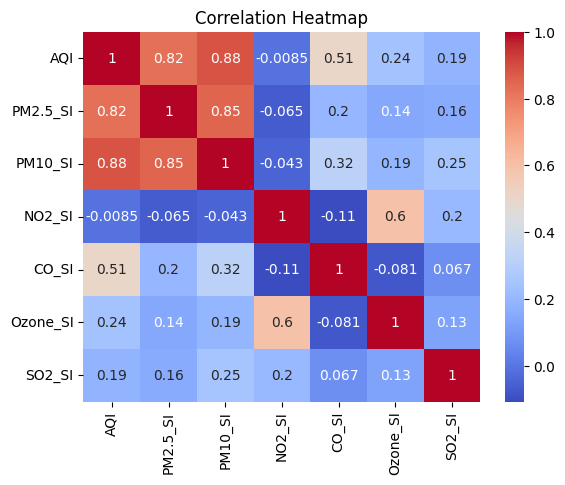

In [ ]:
sns.heatmap(df_filtered[['AQI','PM2.5_SI','PM10_SI','NO2_SI','CO_SI','Ozone_SI','SO2_SI']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import plotly as ply
ply.plot(df_filtered['AQI'],kind='line')

In [ ]:
new_df=df_filtered.copy()
print(new_df.head())

                PM2.5       PM10        NO        NO2        NOx        NH3  \
From                                                                          
2024-03-08   3.072083   8.754167  0.815000   2.385833   3.200833   1.082500   
2024-03-09   3.520417  12.969583  1.537083   1.605833   3.143333   1.826250   
2024-03-18   0.987500   2.856250  0.589167   1.153333   1.307500   1.742500   
2024-03-19  11.980417  33.704167  6.425417  11.052917  17.477917  17.478333   
2024-03-20  11.632917  28.080417  7.044167  13.749167  20.576250  20.791667   

                 SO2       CO     Ozone   PM2.5_SI    PM10_SI     NO2_SI  \
From                                                                       
2024-03-08  1.511667  0.56250  16.37000   3.072083   8.754167   2.385833   
2024-03-09  1.700417  0.64375  28.83375   3.520417  12.969583   1.605833   
2024-03-18  0.809167  0.14875  13.41750   0.987500   2.856250   1.153333   
2024-03-19  6.670000  0.86375  39.78250  11.980417  33.704167  11.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#new_df[['PM2.5','PM10','NO2','CO','Ozone','SO2']]=scaler.fit_transform(new_df[['PM2.5','PM10','NO2','CO','Ozone','SO2']])

In [ ]:
new_df.drop(['PM2.5_SI','PM10_SI','NO2_SI','CO_SI','Ozone_SI','SO2_SI'],axis=1,inplace=True)

KeyError: "['PM2.5_SI', 'PM10_SI', 'NO2_SI', 'CO_SI', 'Ozone_SI', 'SO2_SI'] not found in axis"

In [ ]:
from sklearn.model_selection import train_test_split
X=new_df[['PM2.5', 'PM10', 'NO2', 'CO', 'Ozone','SO2']]
y=new_df['AQI']
print(max(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(max(y_test))

185.3236111111111
121.31333333333333


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_model.fit(X_train, y_train)
y_pred_rfr = rfr_model.predict(X_test)
print(max(y_pred_rfr))
print(max(y_test))
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
mae_rfr=mean_absolute_error(y_test, y_pred_rfr)
print("Mean Squared Error:", mse_rfr)
print("Mean Absolute Error:", mae_rfr)


122.18006111111126
121.31333333333333
Mean Squared Error: 6.21722138547805
Mean Absolute Error: 1.6811558776167492


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 10],
    "learning_rate": [0.01, 0.05, 0.1]
}

grid = GridSearchCV(XGBRegressor(), param_grid=params, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)
xg_model = XGBRegressor(n_estimators=200,learning_rate=0.05,max_depth=4, random_state=42,eval_metric="rmse",
    early_stopping_rounds=50,reg_alpha=5,reg_lambda=5,)
xg_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
   # Stop if validation loss doesn’t improve for 50 rounds
    verbose=True
)
print(xg_model.get_params()["objective"])
y_pred_xg = xg_model.predict(X_test)
mse_xg = mean_squared_error(y_test, y_pred_xg)
mae_xg=mean_absolute_error(y_test, y_pred_xg)
print("Mean Squared Error:", mse_xg)
print("Mean Absolute Error:", mae_xg)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
[0]	validation_0-rmse:23.09842
[1]	validation_0-rmse:22.11579
[2]	validation_0-rmse:21.18349
[3]	validation_0-rmse:20.28139
[4]	validation_0-rmse:19.41300
[5]	validation_0-rmse:18.60333
[6]	validation_0-rmse:17.81738
[7]	validation_0-rmse:17.08582
[8]	validation_0-rmse:16.38809
[9]	validation_0-rmse:15.71278
[10]	validation_0-rmse:15.09263
[11]	validation_0-rmse:14.47967
[12]	validation_0-rmse:13.92844
[13]	validation_0-rmse:13.41727
[14]	validation_0-rmse:12.93659
[15]	validation_0-rmse:12.45685
[16]	validation_0-rmse:12.02330
[17]	validation_0-rmse:11.60241
[18]	validation_0-rmse:11.20176
[19]	validation_0-rmse:10.81184
[20]	validation_0-rmse:10.42418
[21]	validation_0-rmse:10.07949
[22]	validation_0-rmse:9.76067
[23]	validation_0-rmse:9.43482
[24]	validation_0-rmse:9.08586
[25]	validation_0-rmse:8.79248
[26]	validation_0-rmse:8.50900
[27]	validation_0-rmse:8.23517
[28]	validation_0-rmse:7.98102
[29]	validation_0-rmse:7.7325

In [ ]:
from sklearn.metrics import mean_absolute_error

y_train_pred = xg_model.predict(X_train)
y_test_pred = xg_model.predict(X_test)

print("Train Error:", mean_absolute_error(y_train, y_train_pred))
print("Test Error:", mean_absolute_error(y_test, y_test_pred))


Train Error: 1.640315282740738
Test Error: 2.376542699325488


In [ ]:
from sklearn.metrics import mean_absolute_error

y_train_pred = rfr_model.predict(X_train)
y_test_pred = rfr_model.predict(X_test)

print("Train Error:", mean_absolute_error(y_train, y_train_pred))
print("Test Error:", mean_absolute_error(y_test, y_test_pred))


Train Error: 1.147720785353537
Test Error: 1.6811558776167492


In [ ]:
a=np.array([249,276,49,10,32,32])
print(rfr_model.predict(a.reshape(1,-1)))

[164.09652222]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [ ]:
pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.7 MB/s eta 0:00:00


In [ ]:
import pickle

# Save trained model
with open("rfr_model.pkl", "wb") as f:
    pickle.dump(rfr_model, f)


In [ ]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np

# Load trained model (replace with your actual model)
rfr_model = pickle.load(open("rfr_model.pkl", "rb"))

st.title("Air Quality Prediction 🌍💨")
st.write("Enter values to predict Air Quality Index (AQI)")

# Create input fields
pm25 = st.number_input("PM2.5 Level", min_value=0.0, format="%.2f")
pm10 = st.number_input("PM10 Level", min_value=0.0, format="%.2f")
no2 = st.number_input("NO2 Level", min_value=0.0, format="%.2f")
so2 = st.number_input("SO2 Level", min_value=0.0, format="%.2f")
o3 = st.number_input("O3 Level", min_value=0.0, format="%.2f")
co = st.number_input("CO Level", min_value=0.0, format="%.2f")

if st.button("Predict AQI"):
    input_data = np.array([[pm25, pm10, no2,co,o3,so2]])  # Adjust for your feature size
    prediction = rfr_model.predict(input_data)
    print(prediction)
    st.success(f"Predicted AQI: {prediction:}")


Overwriting app.py


In [ ]:
!streamlit run app.py &>/dev/null &


In [ ]:
!ngrok authtoken 2u2bHMoP6IGtcdYdUS3Ql2IzDDp_239psmmjURAjdFb7zJKK7

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

# Connect to Streamlit's default port (8501)
public_url = ngrok.connect(8501)
print(f"Open the Streamlit app here: {public_url}")


Open the Streamlit app here: NgrokTunnel: "https://b405-34-41-55-147.ngrok-free.app" -> "http://localhost:8501"
